In [1]:
import pandas as pd
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

import prepare
import acquire

import matplotlib.pyplot as plt
import seaborn as sns

1. Spam Data
    1. Load the spam data set.
    2. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    3. Is there any overlap in the bigrams for the spam data and the ham data?
    4. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.
    5. Bonus: plot document length information of spam vs. ham. Does there appear to be a difference?
2. Explore the blog articles using the techniques discussed in the exploration lesson.
3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

# EXERCISE 1.A
### Load the spam data set.

### Acquire Spam
Loading the Spam Dataset

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Prepare Spam

In [3]:
df['text_cleaned'] = df.text.apply(prepare.basic_clean)
df.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...


In [4]:
df['text_tokenized'] = df.text_cleaned.apply(prepare.tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...


In [5]:
df['text_lemmatized'] = df.text_tokenized.apply(prepare.lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...


In [6]:
num_stopwords_removed = []

In [7]:
df['text_filtered'] = df.text_lemmatized.apply(prepare.remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though


In [8]:
df['num_stopwords_removed'] = df.apply(lambda row: len(row['text_lemmatized'].split()) - len(row['text_filtered'].split()), axis=1)

In [9]:
df

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,num_stopwords_removed
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,4
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,7
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,7
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u i12750 pound priz...,10
5568,ham,Will ï¿½_ b going to esplanade fr home?,will i12 b going to esplanade fr home,will i12 b going to esplanade fr home,will i12 b going to esplanade fr home,i12 b going esplanade fr home,2
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,pity was in mood for that soany other suggestions,pity wa in mood for that soany other suggestion,pity wa mood soany suggestion,4
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like i '...,the guy did some bitching but i acted like i '...,guy bitching acted like ' interested buying so...,14


In [10]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
df = pd.concat([df, pd.DataFrame({'words': words})], axis = 1)
df

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,num_stopwords_removed,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,4,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,0,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,7,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,2,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,7,"[nahthink, go, usf, life, around, though]"
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u i12750 pound priz...,10,"[2nd, time, triedcontactu, i12750, pound, priz..."
5568,ham,Will ï¿½_ b going to esplanade fr home?,will i12 b going to esplanade fr home,will i12 b going to esplanade fr home,will i12 b going to esplanade fr home,i12 b going esplanade fr home,2,"[i12going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,pity was in mood for that soany other suggestions,pity wa in mood for that soany other suggestion,pity wa mood soany suggestion,4,"[pity, wa, mood, soany, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like i '...,the guy did some bitching but i acted like i '...,guy bitching acted like ' interested buying so...,14,"[guy, bitching, acted, likeinterested, buying,..."


In [11]:
doc_length = [len(wordlist) for wordlist in df.words]

In [12]:
df['doc_length'] = doc_length
df = df[df.doc_length != 0]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,num_stopwords_removed,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,4,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,0,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,7,"[free, entrywkly, comp, win, fa, cup, final, t...",20
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,2,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,7,"[nahthink, go, usf, life, around, though]",6


In [13]:
# Creating a single string of all words in the df
ham_words = ' '.join(df[df.label == 'ham'].text_filtered)
spam_words = ' '.join(df[df.label == 'spam'].text_filtered)
all_words = ' '.join(df.text_filtered)

# Removing single character words
ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

# Creating series containing frequency of words in the df
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [14]:
# Creating a dataframe containing the words and their frequency in each category
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int)))

In [15]:
word_counts.head()

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


# EXERCISE 1.B
### Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [16]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,num_stopwords_removed,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,4,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,0,"[ok, lar, joking, wifoni]",4,"[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,7,"[free, entrywkly, comp, win, fa, cup, final, t...",20,"[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,2,"[u, dun, say, early, horc, already, say]",7,"[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,nah i don ' t think he goes to usf he lives ar...,nah i don ' t think he go to usf he life aroun...,nah ' think go usf life around though,7,"[nahthink, go, usf, life, around, though]",6,"[(nahthink, go), (go, usf), (usf, life), (life..."


In [17]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts()
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts()

In [18]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

spam_data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
spam_data

{'please call': 43,
 'customer service': 27,
 'guaranteed call': 23,
 'po box': 23,
 'prize guaranteed': 22,
 'i121000 cash': 20,
 'send stop': 19,
 'every week': 19,
 'urgent mobile': 18,
 'land line': 18,
 'await collection': 18,
 'valid 12hrs': 17,
 'sae tc': 16,
 'claim call': 16,
 'account statement': 16,
 'selected receive': 15,
 'call mobileupd8': 15,
 'reply call': 15,
 'identifier code': 15,
 'call customer': 15,
 'call 08000930705': 15,
 'ur awarded': 14,
 'line claim': 14,
 'week txt': 14,
 '2nd attempt': 14,
 'tell ur': 14,
 'draw show': 13,
 'private 2003': 13,
 'txt nokia': 13,
 'double min': 13,
 '2003 account': 13,
 'half price': 12,
 'txt word': 12,
 'claim code': 12,
 '800 unredeemed': 12,
 'show 800': 12,
 'claim ur': 12,
 'free text': 12,
 'guaranteed i121000': 12,
 'point call': 12,
 'i122000 prize': 12,
 'caller prize': 12,
 'camcorder reply': 12,
 'per min': 12,
 'network min': 12,
 '1st week': 11,
 'chance win': 11,
 'reply stop': 11,
 'ur mate': 11,
 'awarded i

In [19]:
ham_data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
ham_data

{'let know': 33,
 'sorrycall later': 33,
 'good morning': 30,
 'new year': 26,
 'pls send': 22,
 'take care': 21,
 'good night': 19,
 'hi hi': 18,
 'great day': 17,
 'ltgt min': 16,
 'happy new': 15,
 'dont know': 15,
 'last night': 15,
 'ok lor': 14,
 'pick phone': 13,
 'like ltgt': 13,
 'nice day': 12,
 'phone right': 12,
 'send message': 12,
 'right pls': 12,
 'cant pick': 12,
 'want go': 12,
 'good day': 11,
 'gud ni8': 11,
 'good afternoon': 11,
 'happy birthday': 11,
 'gud mrng': 11,
 'hi darlin': 10,
 'across sea': 10,
 'last week': 10,
 'want come': 10,
 'go day': 10,
 'hope good': 10,
 'get back': 10,
 'come home': 9,
 'thats cool': 9,
 'next week': 9,
 'come back': 9,
 'ltgt th': 9,
 'watching tv': 8,
 'feel like': 8,
 'one day': 8,
 'call later': 8,
 'please call': 8,
 'morning dear': 8,
 'gud nyt': 7,
 'ill get': 7,
 'keep touch': 7,
 'today birthday': 7,
 'ur smile': 7,
 'ur friend': 7,
 'ur home': 7,
 'come tomorrow': 7,
 'later tonight': 7,
 'ltgt minute': 7,
 'love ya':

(-0.5, 799.5, 399.5, -0.5)

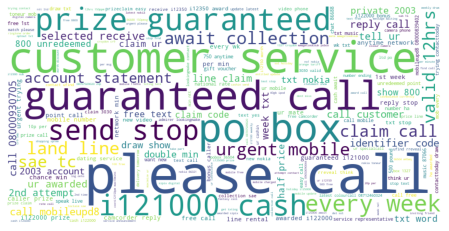

In [20]:
spam_img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(spam_data)
plt.figure(figsize=(8, 4))
plt.imshow(spam_img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

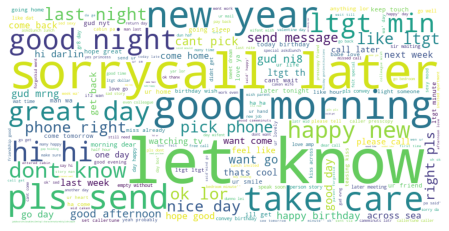

In [21]:
ham_img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(ham_data)
plt.figure(figsize=(8, 4))
plt.imshow(ham_img)
plt.axis('off')

# EXERCISE 1.C

### Is there any overlap in the bigrams for the spam data and the ham data?

In [22]:
overlapping_bigrams = dict()

for bigram in spam_data:
    if (bigram in ham_data) and not (bigram in overlapping_bigrams):
        overlapping_bigrams[bigram] = 1
    elif (bigram in ham_data) and (bigram in overlapping_bigrams):
        overlapping_bigrams[bigram] += 1

overlapping_bigrams

{'please call': 1,
 'customer service': 1,
 'po box': 1,
 'every week': 1,
 'tell ur': 1,
 'free call': 1,
 'mobile number': 1,
 'think ur': 1,
 'call free': 1,
 'dont miss': 1,
 'mp3 player': 1,
 'get free': 1,
 'unlimited text': 1,
 'new mobile': 1,
 'term condition': 1,
 'brand new': 1,
 'call back': 1,
 'ur friend': 1,
 'reference number': 1,
 'please go': 1,
 'call landline': 1,
 'someone ha': 1,
 'get ur': 1,
 'girl waiting': 1,
 'free message': 1,
 'missed call': 1,
 'valentine day': 1,
 'tonight want': 1,
 'hi babe': 1,
 'great new': 1,
 'need help': 1,
 'one like': 1,
 'message call': 1,
 'msg reply': 1,
 'call cost': 1,
 'go another': 1,
 'day send': 1,
 'pls call': 1,
 'call call': 1,
 'text word': 1,
 'enjoy one': 1,
 'live call': 1,
 'well done': 1,
 'text back': 1,
 'new year': 1,
 'hope enjoyed': 1,
 'next month': 1,
 'call text': 1,
 'im bored': 1,
 'would like': 1,
 'sent ur': 1,
 'hey really': 1,
 'look like': 1,
 'maybe even': 1,
 'week get': 1,
 'ha changed': 1,
 'h

# EXERCISE 1.D

### Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [23]:
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts()
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts()

In [24]:
ham_trigrams

(happy, new, year)                    13
(pick, phone, right)                  12
(cant, pick, phone)                   12
(right, pls, send)                    12
(phone, right, pls)                   12
                                      ..
(smiling, yup, i12)                    1
(ii12i12i12m, happy, splash)           1
(experience, understand, american)     1
(rate, new, zealand)                   1
(roommate, tonight, said)              1
Length: 30722, dtype: int64

In [25]:
spam_trigrams

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(private, 2003, account)      13
(reply, call, 08000930705)    13
                              ..
(ur, 250, sm)                  1
(88888, tc, apply)             1
(line, claim, y87)             1
(pic, hot, nearly)             1
(get, prem, rate)              1
Length: 7604, dtype: int64

In [26]:
tri_spam_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}
tri_spam_data

{'prize guaranteed call': 21,
 'call customer service': 15,
 'land line claim': 14,
 'private 2003 account': 13,
 'reply call 08000930705': 13,
 '2003 account statement': 13,
 'show 800 unredeemed': 12,
 'camcorder reply call': 12,
 'guaranteed i121000 cash': 12,
 'every week txt': 11,
 'anytime network min': 11,
 'bonus caller prize': 11,
 'customer service representative': 10,
 'cash await collection': 10,
 'please call customer': 10,
 'i122000 bonus caller': 10,
 'urgent mobile number': 9,
 '800 unredeemed point': 9,
 'toneur mob every': 9,
 'draw txt music': 9,
 'trying contacttoday draw': 9,
 'contacttoday draw show': 9,
 'mobile number ha': 9,
 'mob every week': 9,
 '750 anytime network': 9,
 'txt music 87066': 9,
 'free 1st week': 9,
 'i122000 prize guaranteed': 9,
 'unredeemed point call': 9,
 'match please call': 8,
 'await collection sae': 8,
 'number ha awarded': 8,
 'urgent trying contacttoday': 8,
 'lookingmake contact ufind': 8,
 'ufind rreveal think': 8,
 'rreveal think 

In [27]:
tri_ham_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
tri_ham_data

{'happy new year': 13,
 'pick phone right': 12,
 'cant pick phone': 12,
 'right pls send': 12,
 'phone right pls': 12,
 'hi hi hi': 11,
 'pls send message': 10,
 'good morning dear': 7,
 'kiss across sea': 6,
 'convey birthday wish': 6,
 'pls convey birthday': 6,
 'wid caken wife': 5,
 "minute'' ok' sed": 5,
 'caller presscopy friend': 5,
 'special askdlunch lunch': 5,
 "go bedroom minute''": 5,
 "happy' day bos'": 5,
 'felt special askdlunch': 5,
 'went work even': 5,
 "said'mind go bedroom": 5,
 'lunch invited apartment': 5,
 'entered cabin pa': 5,
 'parent forgotkid went': 5,
 "pa said' happy'": 5,
 'latr wid caken': 5,
 'day wifent wish': 5,
 'wifent wish parent': 5,
 "day bos' felt": 5,
 'askdlunch lunch invited': 5,
 'man last week': 5,
 "last week wa'": 5,
 "wa' day wifent": 5,
 'cameminuts latr wid': 5,
 'sorrycall later meeting': 5,
 'callertune caller presscopy': 5,
 'forgotkid went work': 5,
 'wish parent forgotkid': 5,
 'sexy mood cameminuts': 5,
 "said' happy' day": 5,
 "c

(-0.5, 799.5, 399.5, -0.5)

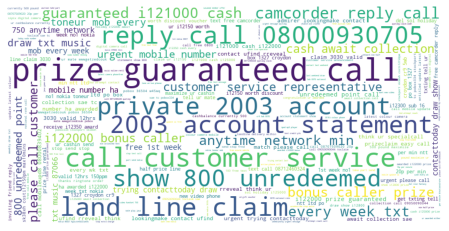

In [28]:
tri_spam_img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(tri_spam_data)
plt.figure(figsize=(8, 4))
plt.imshow(tri_spam_img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

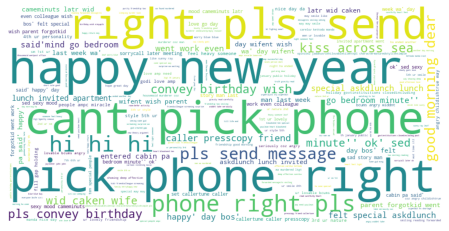

In [29]:
tri_ham_img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(tri_ham_data)
plt.figure(figsize=(8, 4))
plt.imshow(tri_ham_img)
plt.axis('off')

In [30]:
overlapping_trigrams = dict()

for trigram in tri_spam_data:
    if (trigram in tri_ham_data) and not (trigram in overlapping_trigrams):
        overlapping_trigrams[trigram] = 1
    elif (trigram in tri_ham_data) and (trigram in overlapping_trigrams):
        overlapping_trigrams[trigram] += 1

overlapping_trigrams

{'please call back': 1,
 'called left message': 1,
 'new year eve': 1,
 'sorry missed call': 1}

# EXERCISE 1.E (Bonus)
### Plot document length information of spam vs. ham. Does there appear to be a difference?

Text(0.5, 1.0, 'Distribution of document lengths of messages labeled "ham"')

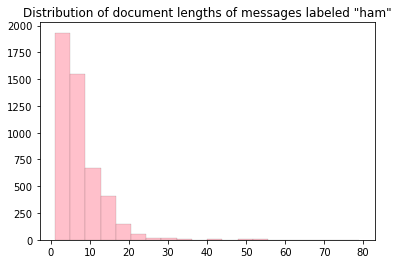

In [31]:
plt.hist(df[df.label == 'ham'].doc_length, bins = 20, edgecolor='black', linewidth=.1, color = 'pink')
plt.title('Distribution of document lengths of messages labeled "ham"')

Text(0.5, 1.0, 'Distribution of document lengths of messages labeled "spam"')

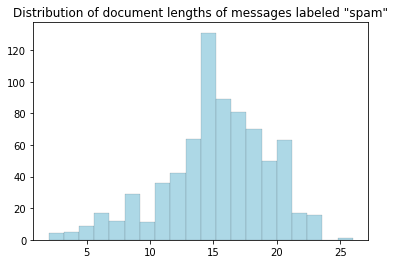

In [32]:
plt.hist(df[df.label == 'spam'].doc_length, bins = 20, edgecolor='black', linewidth=.1, color = 'lightblue')
plt.title('Distribution of document lengths of messages labeled "spam"')

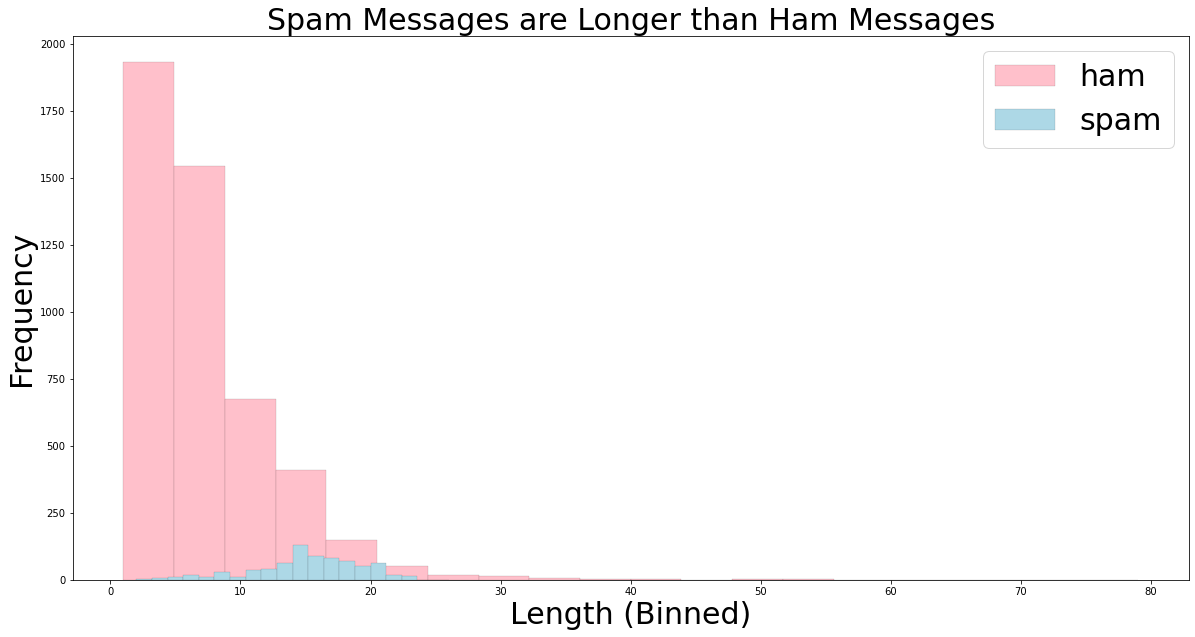

In [33]:
plt.figure(figsize=(20,10))
plt.hist(df[df.label == 'ham'].doc_length, bins = 20, edgecolor='black', linewidth=.1, color = 'pink', label ='ham')
plt.hist(df[df.label == 'spam'].doc_length, bins = 20, edgecolor='black', linewidth=.1, color = 'lightblue', label = 'spam')
plt.title('Spam Messages are Longer than Ham Messages', fontdict = {'fontsize' : 30})
plt.xlabel('Length (Binned)', fontdict = {'fontsize' : 30})
plt.ylabel('Frequency', fontdict = {'fontsize' : 30})
plt.legend(prop={'size': 30})

In [34]:
df[df.label == 'spam'].doc_length.describe()

count    747.000000
mean      15.139224
std        4.116520
min        2.000000
25%       13.000000
50%       16.000000
75%       18.000000
max       26.000000
Name: doc_length, dtype: float64

In [35]:
df[df.label == 'ham'].doc_length.describe()

count    4820.000000
mean        7.029876
std         5.535182
min         1.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        79.000000
Name: doc_length, dtype: float64

In [36]:
df[(df.label=='spam') & (df.doc_length == 2)]

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,num_stopwords_removed,words,doc_length,bigrams
3740,spam,2/2 146tf150p,22 146tf150p,22 146tf150p,22 146tf150p,22 146tf150p,0,"[22, 146tf150p]",2,"[(22, 146tf150p)]"
3979,spam,ringtoneking 84484,ringtoneking 84484,ringtoneking 84484,ringtoneking 84484,ringtoneking 84484,0,"[ringtoneking, 84484]",2,"[(ringtoneking, 84484)]"


In [37]:
df[(df.label=='ham') & (df.doc_length == 1)]

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,num_stopwords_removed,words,doc_length,bigrams
43,ham,WHO ARE YOU SEEING?,who are you seeing,who are you seeing,who are you seeing,seeing,3,[seeing],1,[]
127,ham,Are you there in room.,are you there in room,are you there in room,are you there in room,room,4,[room],1,[]
130,ham,I'm home.,i'm home,i ' m home,i ' m home,' home,2,[home],1,[]
181,ham,Lol no. U can trust me.,lol no u can trust me,lol no u can trust me,lol no u can trust me,lol u trust,3,[loltrust],1,[]
252,ham,What you doing?how are you?,what you doinghow are you,what you doinghow are you,what you doinghow are you,doinghow,4,[doinghow],1,[]
...,...,...,...,...,...,...,...,...,...,...
5357,ham,Ok,ok,ok,ok,ok,0,[ok],1,[]
5408,ham,... Are you in the pub?,are you in the pub,are you in the pub,are you in the pub,pub,4,[pub],1,[]
5418,ham,So how are you really. What are you up to. How...,so how are you really what are you up to how's...,so how are you really what are you up to how '...,so how are you really what are you up to how '...,really ' master,15,[reallymaster],1,[]
5471,ham,Yup,yup,yup,yup,yup,0,[yup],1,[]


In [38]:
print(df[df.text_filtered == "really ' master"].text[5418])

So how are you really. What are you up to. How's the masters. And so on.


(array([2.771e+03, 1.262e+03, 5.450e+02, 1.380e+02, 6.200e+01, 1.400e+01,
        1.000e+01, 7.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0. ,   5.5,  11. ,  16.5,  22. ,  27.5,  33. ,  38.5,  44. ,
         49.5,  55. ,  60.5,  66. ,  71.5,  77. ,  82.5,  88. ,  93.5,
         99. , 104.5, 110. ]),
 <BarContainer object of 20 artists>)

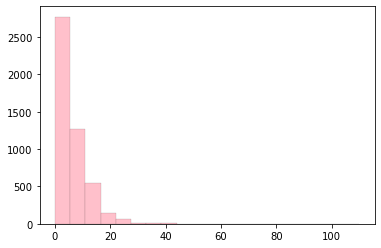

In [61]:
plt.hist(df[df.label == 'ham'].num_stopwords_removed, bins = 20, edgecolor='black', linewidth=.1, color = 'pink')

In [65]:
df[df.label == 'ham'].num_stopwords_removed.describe()

count    4820.000000
mean        6.280290
std         6.016446
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max       110.000000
Name: num_stopwords_removed, dtype: float64

(array([ 9.,  9., 36., 56., 71., 92., 84., 76., 78.,  0., 69., 60., 50.,
        17., 12., 11.,  4.,  9.,  3.,  1.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
         9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. ]),
 <BarContainer object of 20 artists>)

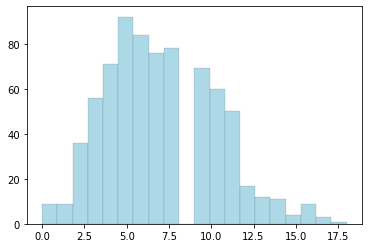

In [62]:
plt.hist(df[df.label == 'spam'].num_stopwords_removed, bins = 20, edgecolor='black', linewidth=.1, color = 'lightblue')

In [64]:
df[df.label == 'spam'].num_stopwords_removed.describe()

count    747.000000
mean       6.975904
std        3.304795
min        0.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       18.000000
Name: num_stopwords_removed, dtype: float64

# EXERCISE 2
### Explore the blog articles using the techniques discussed in the exploration lesson.

In [39]:
urls = acquire.get_all_urls()

In [40]:
blog = acquire.get_blog_articles(urls)

In [41]:
blog

,title,content
0,How Codeup Alumni are Helping to Make Water,Imagine having a kit mailed to you with all th...
1,What Data Science Career is For You?,If you’re struggling to see yourself as a data...
2,Your Education is an Investment,You have many options regarding educational ro...
3,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu..."
4,How We’re Celebrating World Mental Health Day ...,World Mental Health Day is on October 10th. Al...
5,What is Codeup’s Application Process?,Curious about Codeup’s application process? Wo...
6,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will..."
7,Alumni Share their Journey into Web Development,Everyone starts somewhere. Many developers out...
8,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...
9,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ..."


In [42]:
print(blog.iloc[0].content)

Imagine having a kit mailed to you with all the necessary components to make contaminated water clean. Cool, huh? Four of our alumni are helping to make that possible by partnering with the non-profit Elequa to design a website for their Make Water program. With this project, these Codeup alumni have the potential to make a global impact: Jacqueline Murralles, James Murralles, Ted Zamarron, and Carlos Teller. 
How Elequa is Making a Difference
The Make Water program inspires, educates, and equips people that want to make a tangible difference in the world. Elequa puts together DIY kits with the tools to purify water and delivers them to people that need them, locally and abroad. This project is also given to students in the San Antonio area, who in turn are challenged to research, tweak, and further develop the kits to make them better and more accessible. These problem-solving challenges engage students in the STEM field, inspiring teamwork and collaboration while making a difference 

In [43]:
blog = prepare.prep_article_data(blog, 'content')
blog

,title,content,stemmed,lemmatized,clean
0,How Codeup Alumni are Helping to Make Water,Imagine having a kit mailed to you with all th...,imagin have a kit mail to you with all the nec...,imagine having a kit mailed to you with all th...,imagine kit mailed necessary component make co...
1,What Data Science Career is For You?,If you’re struggling to see yourself as a data...,if your struggl to see yourself as a data scie...,if youre struggling to see yourself a a data s...,youre struggling see data science professional...
2,Your Education is an Investment,You have many options regarding educational ro...,you have mani option regard educ rout to your ...,you have many option regarding educational rou...,many option regarding educational route desire...
3,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu...",here at codeup we believ it time to revolution...,here at codeup we believe it time to revolutio...,codeup believe time revolutionize hiring launc...
4,How We’re Celebrating World Mental Health Day ...,World Mental Health Day is on October 10th. Al...,world mental health day is on octob 10th all o...,world mental health day is on october 10th all...,world mental health day october 10th u codeup ...
5,What is Codeup’s Application Process?,Curious about Codeup’s application process? Wo...,curiou about codeup applic process wonder whi ...,curious about codeups application process wond...,curious codeups application process wondering ...
6,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will...",come into our data scienc program you will nee...,coming into our data science program you will ...,coming data science program need know math sta...
7,Alumni Share their Journey into Web Development,Everyone starts somewhere. Many developers out...,everyon start somewher mani develop out there ...,everyone start somewhere many developer out th...,everyone start somewhere many developer didnt ...
8,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,mani codeup alumni enjoy compet in hackathon a...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...
9,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ...",bryan walsh codeup web develop alum and misti ...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum misty ...


In [44]:
blog_words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in blog.clean]

In [45]:
blog = pd.concat([blog, pd.DataFrame({'words': blog_words})], axis = 1)
blog

,title,content,stemmed,lemmatized,clean,words
0,How Codeup Alumni are Helping to Make Water,Imagine having a kit mailed to you with all th...,imagin have a kit mail to you with all the nec...,imagine having a kit mailed to you with all th...,imagine kit mailed necessary component make co...,"[imagine, kit, mailed, necessary, component, m..."
1,What Data Science Career is For You?,If you’re struggling to see yourself as a data...,if your struggl to see yourself as a data scie...,if youre struggling to see yourself a a data s...,youre struggling see data science professional...,"[youre, struggling, see, data, science, profes..."
2,Your Education is an Investment,You have many options regarding educational ro...,you have mani option regard educ rout to your ...,you have many option regarding educational rou...,many option regarding educational route desire...,"[many, option, regarding, educational, route, ..."
3,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu...",here at codeup we believ it time to revolution...,here at codeup we believe it time to revolutio...,codeup believe time revolutionize hiring launc...,"[codeup, believe, time, revolutionize, hiring,..."
4,How We’re Celebrating World Mental Health Day ...,World Mental Health Day is on October 10th. Al...,world mental health day is on octob 10th all o...,world mental health day is on october 10th all...,world mental health day october 10th u codeup ...,"[world, mental, health, day, october, 10thcode..."
5,What is Codeup’s Application Process?,Curious about Codeup’s application process? Wo...,curiou about codeup applic process wonder whi ...,curious about codeups application process wond...,curious codeups application process wondering ...,"[curious, codeups, application, process, wonde..."
6,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will...",come into our data scienc program you will nee...,coming into our data science program you will ...,coming data science program need know math sta...,"[coming, data, science, program, need, know, m..."
7,Alumni Share their Journey into Web Development,Everyone starts somewhere. Many developers out...,everyon start somewher mani develop out there ...,everyone start somewhere many developer out th...,everyone start somewhere many developer didnt ...,"[everyone, start, somewhere, many, developer, ..."
8,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,mani codeup alumni enjoy compet in hackathon a...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...,"[many, codeup, alumnus, enjoy, competing, hack..."
9,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ...",bryan walsh codeup web develop alum and misti ...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum misty ...,"[bryan, walsh, codeup, web, development, alum,..."


In [46]:
blog_text = ' '.join(blog.clean)
blog_text

'imagine kit mailed necessary component make contaminated water clean cool huh four alumnus helping make possible partnering nonprofit elequa design website make water program project codeup alumnus potential make global impact jacqueline murralles james murralles ted zamarron carlos teller elequa making difference make water program inspires educates equips people want make tangible difference world elequa put together diy kit tool purify water delivers people need locally abroad project also given student san antonio area turn challenged research tweak develop kit make better accessible problemsolving challenge engage student stem field inspiring teamwork collaboration making difference proud helping provide clean water codeup alumnus making difference currently make water program lack platform house share data gathered student improve kit also challenging community member development needed help gamification process make participation engaging thats codeup alumnus jacqueline murrall

In [47]:
blog_freq = pd.Series(blog_text.split()).value_counts()
blog_freq.head()

data        137
codeup      108
job          51
science      51
learning     51
dtype: int64

In [48]:
blog_length = [len(wordlist) for wordlist in blog.words]
blog['length'] = blog_length
blog

,title,content,stemmed,lemmatized,clean,words,length
0,How Codeup Alumni are Helping to Make Water,Imagine having a kit mailed to you with all th...,imagin have a kit mail to you with all the nec...,imagine having a kit mailed to you with all th...,imagine kit mailed necessary component make co...,"[imagine, kit, mailed, necessary, component, m...",193
1,What Data Science Career is For You?,If you’re struggling to see yourself as a data...,if your struggl to see yourself as a data scie...,if youre struggling to see yourself a a data s...,youre struggling see data science professional...,"[youre, struggling, see, data, science, profes...",370
2,Your Education is an Investment,You have many options regarding educational ro...,you have mani option regard educ rout to your ...,you have many option regarding educational rou...,many option regarding educational route desire...,"[many, option, regarding, educational, route, ...",158
3,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu...",here at codeup we believ it time to revolution...,here at codeup we believe it time to revolutio...,codeup believe time revolutionize hiring launc...,"[codeup, believe, time, revolutionize, hiring,...",173
4,How We’re Celebrating World Mental Health Day ...,World Mental Health Day is on October 10th. Al...,world mental health day is on octob 10th all o...,world mental health day is on october 10th all...,world mental health day october 10th u codeup ...,"[world, mental, health, day, october, 10thcode...",186
5,What is Codeup’s Application Process?,Curious about Codeup’s application process? Wo...,curiou about codeup applic process wonder whi ...,curious about codeups application process wond...,curious codeups application process wondering ...,"[curious, codeups, application, process, wonde...",483
6,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will...",come into our data scienc program you will nee...,coming into our data science program you will ...,coming data science program need know math sta...,"[coming, data, science, program, need, know, m...",198
7,Alumni Share their Journey into Web Development,Everyone starts somewhere. Many developers out...,everyon start somewher mani develop out there ...,everyone start somewhere many developer out th...,everyone start somewhere many developer didnt ...,"[everyone, start, somewhere, many, developer, ...",510
8,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,mani codeup alumni enjoy compet in hackathon a...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...,"[many, codeup, alumnus, enjoy, competing, hack...",290
9,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ...",bryan walsh codeup web develop alum and misti ...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum misty ...,"[bryan, walsh, codeup, web, development, alum,...",408


(-0.5, 2499.5, 2499.5, -0.5)

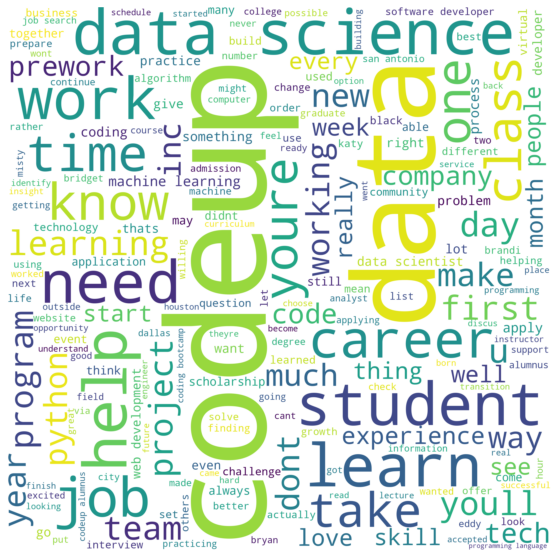

In [49]:
blog_cloud = WordCloud(background_color='white', height=2500, width=2500).generate(blog_text)

plt.figure(figsize=(15,10))
plt.imshow(blog_cloud, interpolation='bilinear')
plt.axis('off')

In [50]:
blog['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in blog.words]
blog

,title,content,stemmed,lemmatized,clean,words,length,bigrams
0,How Codeup Alumni are Helping to Make Water,Imagine having a kit mailed to you with all th...,imagin have a kit mail to you with all the nec...,imagine having a kit mailed to you with all th...,imagine kit mailed necessary component make co...,"[imagine, kit, mailed, necessary, component, m...",193,"[(imagine, kit), (kit, mailed), (mailed, neces..."
1,What Data Science Career is For You?,If you’re struggling to see yourself as a data...,if your struggl to see yourself as a data scie...,if youre struggling to see yourself a a data s...,youre struggling see data science professional...,"[youre, struggling, see, data, science, profes...",370,"[(youre, struggling), (struggling, see), (see,..."
2,Your Education is an Investment,You have many options regarding educational ro...,you have mani option regard educ rout to your ...,you have many option regarding educational rou...,many option regarding educational route desire...,"[many, option, regarding, educational, route, ...",158,"[(many, option), (option, regarding), (regardi..."
3,Introducing Our Salary Refund Guarantee,"Here at Codeup, we believe it’s time to revolu...",here at codeup we believ it time to revolution...,here at codeup we believe it time to revolutio...,codeup believe time revolutionize hiring launc...,"[codeup, believe, time, revolutionize, hiring,...",173,"[(codeup, believe), (believe, time), (time, re..."
4,How We’re Celebrating World Mental Health Day ...,World Mental Health Day is on October 10th. Al...,world mental health day is on octob 10th all o...,world mental health day is on october 10th all...,world mental health day october 10th u codeup ...,"[world, mental, health, day, october, 10thcode...",186,"[(world, mental), (mental, health), (health, d..."
5,What is Codeup’s Application Process?,Curious about Codeup’s application process? Wo...,curiou about codeup applic process wonder whi ...,curious about codeups application process wond...,curious codeups application process wondering ...,"[curious, codeups, application, process, wonde...",483,"[(curious, codeups), (codeups, application), (..."
6,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will...",come into our data scienc program you will nee...,coming into our data science program you will ...,coming data science program need know math sta...,"[coming, data, science, program, need, know, m...",198,"[(coming, data), (data, science), (science, pr..."
7,Alumni Share their Journey into Web Development,Everyone starts somewhere. Many developers out...,everyon start somewher mani develop out there ...,everyone start somewhere many developer out th...,everyone start somewhere many developer didnt ...,"[everyone, start, somewhere, many, developer, ...",510,"[(everyone, start), (start, somewhere), (somew..."
8,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,mani codeup alumni enjoy compet in hackathon a...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...,"[many, codeup, alumnus, enjoy, competing, hack...",290,"[(many, codeup), (codeup, alumnus), (alumnus, ..."
9,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ...",bryan walsh codeup web develop alum and misti ...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum misty ...,"[bryan, walsh, codeup, web, development, alum,...",408,"[(bryan, walsh), (walsh, codeup), (codeup, web..."


In [51]:
blog_bigrams = pd.Series(list(nltk.ngrams(blog_text.split(), 2))).value_counts()
blog_bigrams

(data, science)        48
(machine, learning)    19
(data, scientist)      16
(web, development)     15
(inc, 5000)            12
                       ..
(attempt, deliver)      1
(tow, 30)               1
(solvable, award)       1
(first, week)           1
(hiring, lemon)         1
Length: 6407, dtype: int64

In [52]:
blog_bigram_freq = {k[0] + ' ' + k[1]: v for k, v in blog_bigrams.to_dict().items()}
blog_bigram_freq

{'data science': 48,
 'machine learning': 19,
 'data scientist': 16,
 'web development': 15,
 'inc 5000': 12,
 'software developer': 10,
 'san antonio': 8,
 'job search': 8,
 'every day': 7,
 'codeup alumnus': 7,
 'codeup student': 7,
 'programming language': 7,
 'start date': 6,
 'coding bootcamp': 6,
 'science program': 6,
 'application process': 6,
 'get job': 6,
 'make sure': 6,
 'feel like': 6,
 'job placement': 6,
 'placement team': 6,
 'career data': 5,
 'civtech datathon': 5,
 'annie easley': 5,
 'financial aid': 5,
 'science cohort': 5,
 'used data': 5,
 'learning model': 5,
 'math stats': 5,
 'refund guarantee': 5,
 'mental health': 5,
 'need know': 5,
 'data analyst': 4,
 'professional development': 4,
 'across texas': 4,
 'learn codeup': 4,
 'answer question': 4,
 'make water': 4,
 'dont know': 4,
 'career path': 4,
 'analyst like': 4,
 'youre interested': 4,
 'codeup codeup': 4,
 'admission manager': 4,
 'finding codeup': 4,
 'first data': 4,
 'water program': 4,
 'technic

Text(0.5, 0, 'Frequency')

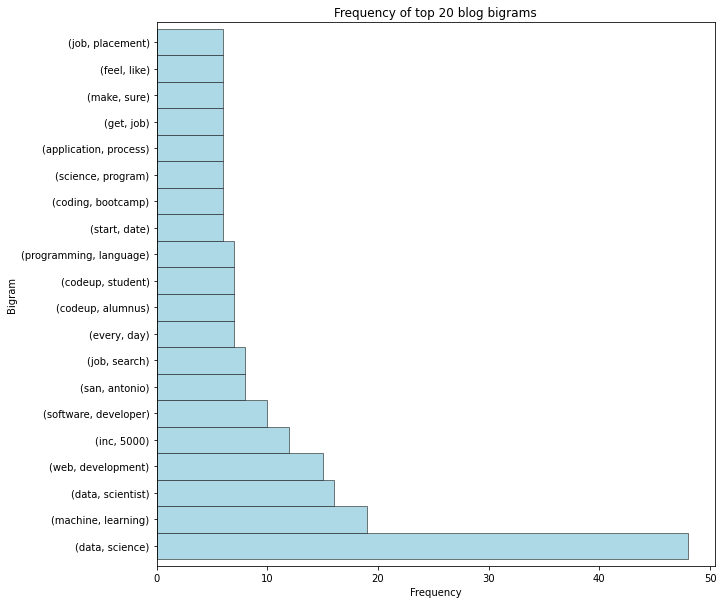

In [53]:
blog_bigrams_top = pd.Series(list(nltk.ngrams(blog_text.split(), 2))).value_counts().head(20)
blog_bigrams_top.plot.barh(color='lightblue', width=1, figsize=(10,10), linewidth=.5, edgecolor='black')
plt.title('Frequency of top 20 blog bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

# EXERCISE 3
### Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [54]:
articles = acquire.get_news_articles()
articles

,topic,title,author,content
0,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...
1,business,Pfizer shares drop 4.5% as Moderna says its va...,Krishna Veera Vanamali,Pfizer’s shares fell as much as 4.5% on Monday...
2,business,Serum Institute's Adar Poonawalla defines what...,Krishna Veera Vanamali,Serum Institute of India CEO Adar Poonawalla t...
3,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...
4,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...
...,...,...,...,...
94,entertainment,Our daughters are not safe: Kangana on Bihar t...,Atul Mishra,Demanding justice for a teenage girl who was b...
95,entertainment,If we're not affected by Sushant's death we're...,Kriti Sharma,"Actor Amit Sadh, who shared screen space with ..."
96,entertainment,Say sorry: Shekhar to those who accused him of...,Atul Mishra,"Shekhar Suman has asked that the ""creeps"" who ..."
97,entertainment,"Heroes can be larger than life, but emotions h...",Kriti Sharma,Actor Suriya Sivakumar said he believes that I...


In [55]:
articles = prepare.prep_article_data(articles, 'content', extra_words=["'"])
articles

The words ["'"] have been added to the stopwords list and will not be returned.
The words ["'"] have been added to the stopwords list and will not be returned.
The words ["'"] have been added to the stopwords list and will not be returned.
The words ["'"] have been added to the stopwords list and will not be returned.
The words ["'"] have been added to the stopwords list and will not be returned.
The words ["'"] have been added to the stopwords list and will not be returned.
The words ["'"] have been added to the stopwords list and will not be returned.
The words ["'"] have been added to the stopwords list and will not be returned.
The words ["'"] have been added to the stopwords list and will not be returned.
The words ["'"] have been added to the stopwords list and will not be returned.
The words ["'"] have been added to the stopwords list and will not be returned.
The words ["'"] have been added to the stopwords list and will not be returned.
The words ["'"] have been added to the s

,title,content,stemmed,lemmatized,clean
0,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",The Centre has imposed a 30-day moratorium on ...,the centr ha impos a 30day moratorium on laksh...,the centre ha imposed a 30day moratorium on la...,centre imposed 30day moratorium lakshmi vila b...
1,Pfizer shares drop 4.5% as Moderna says its va...,Pfizer’s shares fell as much as 4.5% on Monday...,pfizer share fell as much as 45 on monday afte...,pfizers share fell a much a 45 on monday after...,pfizers share fell much 45 monday rival modern...
2,Serum Institute's Adar Poonawalla defines what...,Serum Institute of India CEO Adar Poonawalla t...,serum institut of india ceo adar poonawalla to...,serum institute of india ceo adar poonawalla t...,serum institute india ceo adar poonawalla took...
3,Shutting Delhi markets may prove counterproduc...,Traders' body CAIT on Tuesday said a proposal ...,traders' bodi cait on tuesday said a propos to...,traders' body cait on tuesday said a proposal ...,trader body cait tuesday said proposal impose ...
4,"Musk gets $15bn richer in 2 hours, becomes wor...",Billionaire Elon Musk added $15 billion to his...,billionair elon musk ad 15 billion to hi wealt...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion wealth ...
...,...,...,...,...,...
94,Our daughters are not safe: Kangana on Bihar t...,Demanding justice for a teenage girl who was b...,demand justic for a teenag girl who wa burnt a...,demanding justice for a teenage girl who wa bu...,demanding justice teenage girl burnt alive bih...
95,If we're not affected by Sushant's death we're...,"Actor Amit Sadh, who shared screen space with ...",actor amit sadh who share screen space with su...,actor amit sadh who shared screen space with s...,actor amit sadh shared screen space sushant si...
96,Say sorry: Shekhar to those who accused him of...,"Shekhar Suman has asked that the ""creeps"" who ...",shekhar suman ha ask that the creep who had ac...,shekhar suman ha asked that the creep who had ...,shekhar suman asked creep accused using sushan...
97,"Heroes can be larger than life, but emotions h...",Actor Suriya Sivakumar said he believes that I...,actor suriya sivakumar said he believ that ind...,actor suriya sivakumar said he belief that ind...,actor suriya sivakumar said belief indian film...


In [56]:
articles['num_stopwords_removed'] = articles.apply(lambda row: len(row['lemmatized'].split()) - len(row['clean'].split()), axis=1)
articles

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,content,stemmed,lemmatized,clean,num_stopwords_removed
0,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",The Centre has imposed a 30-day moratorium on ...,the centr ha impos a 30day moratorium on laksh...,the centre ha imposed a 30day moratorium on la...,centre imposed 30day moratorium lakshmi vila b...,21
1,Pfizer shares drop 4.5% as Moderna says its va...,Pfizer’s shares fell as much as 4.5% on Monday...,pfizer share fell as much as 45 on monday afte...,pfizers share fell a much a 45 on monday after...,pfizers share fell much 45 monday rival modern...,24
2,Serum Institute's Adar Poonawalla defines what...,Serum Institute of India CEO Adar Poonawalla t...,serum institut of india ceo adar poonawalla to...,serum institute of india ceo adar poonawalla t...,serum institute india ceo adar poonawalla took...,31
3,Shutting Delhi markets may prove counterproduc...,Traders' body CAIT on Tuesday said a proposal ...,traders' bodi cait on tuesday said a propos to...,traders' body cait on tuesday said a proposal ...,trader body cait tuesday said proposal impose ...,18
4,"Musk gets $15bn richer in 2 hours, becomes wor...",Billionaire Elon Musk added $15 billion to his...,billionair elon musk ad 15 billion to hi wealt...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion wealth ...,20
...,...,...,...,...,...,...
94,Our daughters are not safe: Kangana on Bihar t...,Demanding justice for a teenage girl who was b...,demand justic for a teenag girl who wa burnt a...,demanding justice for a teenage girl who wa bu...,demanding justice teenage girl burnt alive bih...,27
95,If we're not affected by Sushant's death we're...,"Actor Amit Sadh, who shared screen space with ...",actor amit sadh who share screen space with su...,actor amit sadh who shared screen space with s...,actor amit sadh shared screen space sushant si...,29
96,Say sorry: Shekhar to those who accused him of...,"Shekhar Suman has asked that the ""creeps"" who ...",shekhar suman ha ask that the creep who had ac...,shekhar suman ha asked that the creep who had ...,shekhar suman asked creep accused using sushan...,26
97,"Heroes can be larger than life, but emotions h...",Actor Suriya Sivakumar said he believes that I...,actor suriya sivakumar said he believ that ind...,actor suriya sivakumar said he belief that ind...,actor suriya sivakumar said belief indian film...,28


In [57]:
articles_words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in articles.clean]

In [58]:
articles = pd.concat([articles, pd.DataFrame({'words': articles_words})], axis = 1)
articles

,title,content,stemmed,lemmatized,clean,num_stopwords_removed,words
0,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",The Centre has imposed a 30-day moratorium on ...,the centr ha impos a 30day moratorium on laksh...,the centre ha imposed a 30day moratorium on la...,centre imposed 30day moratorium lakshmi vila b...,21,"[centre, imposed, 30day, moratorium, lakshmi, ..."
1,Pfizer shares drop 4.5% as Moderna says its va...,Pfizer’s shares fell as much as 4.5% on Monday...,pfizer share fell as much as 45 on monday afte...,pfizers share fell a much a 45 on monday after...,pfizers share fell much 45 monday rival modern...,24,"[pfizers, share, fell, much, 45, monday, rival..."
2,Serum Institute's Adar Poonawalla defines what...,Serum Institute of India CEO Adar Poonawalla t...,serum institut of india ceo adar poonawalla to...,serum institute of india ceo adar poonawalla t...,serum institute india ceo adar poonawalla took...,31,"[serum, institute, india, ceo, adar, poonawall..."
3,Shutting Delhi markets may prove counterproduc...,Traders' body CAIT on Tuesday said a proposal ...,traders' bodi cait on tuesday said a propos to...,traders' body cait on tuesday said a proposal ...,trader body cait tuesday said proposal impose ...,18,"[trader, body, cait, tuesday, said, proposal, ..."
4,"Musk gets $15bn richer in 2 hours, becomes wor...",Billionaire Elon Musk added $15 billion to his...,billionair elon musk ad 15 billion to hi wealt...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion wealth ...,20,"[billionaire, elon, musk, added, 15, billion, ..."
...,...,...,...,...,...,...,...
94,Our daughters are not safe: Kangana on Bihar t...,Demanding justice for a teenage girl who was b...,demand justic for a teenag girl who wa burnt a...,demanding justice for a teenage girl who wa bu...,demanding justice teenage girl burnt alive bih...,27,"[demanding, justice, teenage, girl, burnt, ali..."
95,If we're not affected by Sushant's death we're...,"Actor Amit Sadh, who shared screen space with ...",actor amit sadh who share screen space with su...,actor amit sadh who shared screen space with s...,actor amit sadh shared screen space sushant si...,29,"[actor, amit, sadh, shared, screen, space, sus..."
96,Say sorry: Shekhar to those who accused him of...,"Shekhar Suman has asked that the ""creeps"" who ...",shekhar suman ha ask that the creep who had ac...,shekhar suman ha asked that the creep who had ...,shekhar suman asked creep accused using sushan...,26,"[shekhar, suman, asked, creep, accused, using,..."
97,"Heroes can be larger than life, but emotions h...",Actor Suriya Sivakumar said he believes that I...,actor suriya sivakumar said he believ that ind...,actor suriya sivakumar said he belief that ind...,actor suriya sivakumar said belief indian film...,28,"[actor, suriya, sivakumar, said, belief, india..."


In [59]:
article_length = [len(wordlist) for wordlist in articles.words]
articles['length'] = article_length
articles

,title,content,stemmed,lemmatized,clean,num_stopwords_removed,words,length
0,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",The Centre has imposed a 30-day moratorium on ...,the centr ha impos a 30day moratorium on laksh...,the centre ha imposed a 30day moratorium on la...,centre imposed 30day moratorium lakshmi vila b...,21,"[centre, imposed, 30day, moratorium, lakshmi, ...",31
1,Pfizer shares drop 4.5% as Moderna says its va...,Pfizer’s shares fell as much as 4.5% on Monday...,pfizer share fell as much as 45 on monday afte...,pfizers share fell a much a 45 on monday after...,pfizers share fell much 45 monday rival modern...,24,"[pfizers, share, fell, much, 45, monday, rival...",34
2,Serum Institute's Adar Poonawalla defines what...,Serum Institute of India CEO Adar Poonawalla t...,serum institut of india ceo adar poonawalla to...,serum institute of india ceo adar poonawalla t...,serum institute india ceo adar poonawalla took...,31,"[serum, institute, india, ceo, adar, poonawall...",29
3,Shutting Delhi markets may prove counterproduc...,Traders' body CAIT on Tuesday said a proposal ...,traders' bodi cait on tuesday said a propos to...,traders' body cait on tuesday said a proposal ...,trader body cait tuesday said proposal impose ...,18,"[trader, body, cait, tuesday, said, proposal, ...",42
4,"Musk gets $15bn richer in 2 hours, becomes wor...",Billionaire Elon Musk added $15 billion to his...,billionair elon musk ad 15 billion to hi wealt...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion wealth ...,20,"[billionaire, elon, musk, added, 15, billion, ...",40
...,...,...,...,...,...,...,...,...
94,Our daughters are not safe: Kangana on Bihar t...,Demanding justice for a teenage girl who was b...,demand justic for a teenag girl who wa burnt a...,demanding justice for a teenage girl who wa bu...,demanding justice teenage girl burnt alive bih...,27,"[demanding, justice, teenage, girl, burnt, ali...",32
95,If we're not affected by Sushant's death we're...,"Actor Amit Sadh, who shared screen space with ...",actor amit sadh who share screen space with su...,actor amit sadh who shared screen space with s...,actor amit sadh shared screen space sushant si...,29,"[actor, amit, sadh, shared, screen, space, sus...",30
96,Say sorry: Shekhar to those who accused him of...,"Shekhar Suman has asked that the ""creeps"" who ...",shekhar suman ha ask that the creep who had ac...,shekhar suman ha asked that the creep who had ...,shekhar suman asked creep accused using sushan...,26,"[shekhar, suman, asked, creep, accused, using,...",33
97,"Heroes can be larger than life, but emotions h...",Actor Suriya Sivakumar said he believes that I...,actor suriya sivakumar said he believ that ind...,actor suriya sivakumar said he belief that ind...,actor suriya sivakumar said belief indian film...,28,"[actor, suriya, sivakumar, said, belief, india...",30


In [60]:
articles_text = ' '.join(articles.clean)
articles_freq = pd.Series(articles_text.split()).value_counts()
articles_freq.head()

said         59
india        34
added        27
u            23
australia    19
dtype: int64